# Import et structuration des données

On structure les données de façon à savoir à quelle condition correspond quel enregistrement

Ici c1 (pas de timer peu de contrainte de temps) correspond aux enregistrements 1,3 et 5

Ici c2 (timer forte contrainte de temps) correspond aux enregistrements 2,4 et 6

Ici c2 (timer peu de contrainte de temps) correspond aux enregistrements 7,8 et 9

In [2]:
import pandas as pd
data={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}

In [3]:
for c in data:
    for r in data[c]:
        data[c][r]=pd.read_csv(c+r+'.tsv', sep='\t')

C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,71,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['c1']['r1']

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,0,1233368193647,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19185,1233368212832,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35839,1233368229486,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65974,1233368259621,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82628,1233368276275,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,277862955,1233646056602,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373.0,692.0
18311,277877683,1233646071330,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18312,277893236,1233646086883,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288.0,767.0
18313,277894168,1233646087815,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,769.0


On découpe les données par question en cherchant les évènements marquant le début d'un stimulus

In [26]:
events={c: {r:data[c][r][['Event','Recording timestamp']].dropna().to_dict()for r in data[c]} for c in data}
time_stamps={c:{r:([i for i in events[c][r]['Event'] if events[c][r]['Event'][i]=="ImageStimulusStart" or events[c][r]['Event'][i]=="VideoStimulusStart"]+[len(data[c][r])]) for r in events[c]} for c in events} 

In [20]:
time_stamps['c1']['r1']

[5644, 6882, 7694, 8673, 10151, 10825, 12566, 15068, 15804, 17126, 18315]

In [10]:
time_stamps['c1']['r3']

[18477]

In [5]:
df={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}
for c in df:
    for r in df[c]:
        for i in range(10):
            t1=time_stamps[c][r][i]
            t2=time_stamps[c][r][i+1]
            temp_df=data[c][r][t1:t2]
            df[c][r]={'q'+str(i+1): data[c][r][time_stamps[c][r][i]:time_stamps[c][r][i+1]] for i in range(10)}

In [379]:
df['c1']['r1']['q1']

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
5644,92230674,1233460424321,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5645,92246179,1233460439826,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5646,92262834,1233460456481,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5647,92279488,1233460473135,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5648,92296143,1233460489790,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,107080442,1233475274089,NaN,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6878,107080442,1233475274089,Mouse,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1663.0,396.0
6879,107085552,1233475279199,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6880,107102207,1233475295854,Eye Tracker,Project3,15/04/2021,Participant1,Recording1,02/04/2021,02/04/2021,15:43:16.027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extraction des AOI

Nous avons rencontré un problème dans le traitement des AOI (globalement le traitement ne s'est pas effectué, les données n'ont pas été enregistrées)
Nous allons donc traiter les AOI de manière "artisanale"

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
img = {'c'+str(i): {'q'+str(j): mpimg.imread('c'+str(i)+'q'+str(j)+'.png') for j in range(1,11)}for i in range(1,4)}

In [8]:
import numpy as np

Nous avons créé des images où chaque couleur représente une AOI
Nous allons stocker ces couleurs dans echantillon_couleurs dont 

In [8]:
echantillons={}
for i in range(1,4):
    echantillons['c'+str(i)]={}
    for j in range(1,11):
        echantillons['c'+str(i)]['q'+str(i)]=[]
echantillons_couleurs={}
for i in range(1,4):
    echantillons_couleurs['c'+str(i)]={}
    for j in range(1,11):
        echantillons_couleurs['c'+str(i)]['q'+str(i)]=[]

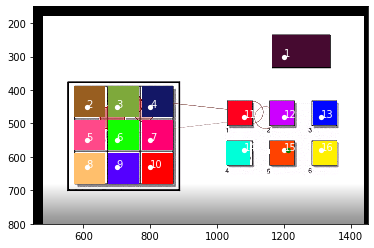

In [757]:
c,q =('c3', 'q8')
#echantillons[c][q]=[[260,500,700,260,500,700,260,500,700,1150,1380,1650,1150,1380,1650],[350,350,350,500,500,500,700,700,700,350,350,350,650,650,650]]
fig, ax = plt.subplots()
ax.imshow(img[c][q])
x=echantillons[c]['q8'][0]
y=echantillons[c]['q8'][1]
ax.scatter(x,y,label=range(len(echantillons)), color="white", linewidth=3, s=5)
#ax.scatter([d[0] for d in dots],[d[1] for d in dots], color="red", linewidth=3, s=5)

ax.scatter(click[c]['r9'][q][0],click[c]['r9'][q][1],label=range(len(echantillons)), color="green", linewidth=3, s=5)
for i in range(len(echantillons[c]['q8'][0])):
    ax.annotate(i+1, (x[i], y[i]), color='white')
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()


In [758]:
echantillons_couleurs[c][q]=[img[c][q][j][i] for i,j in zip(echantillons[c][q][0],echantillons[c][q][1])]

In [486]:
echantillons_couleurs[c][q]

[array([0.59607846, 0.36862746, 0.1254902 ], dtype=float32),
 array([0.49411765, 0.6627451 , 0.23137255], dtype=float32),
 array([0.07450981, 0.09019608, 0.4       ], dtype=float32),
 array([1.        , 0.28627452, 0.5372549 ], dtype=float32),
 array([0.07058824, 1.        , 0.        ], dtype=float32),
 array([1.        , 0.        , 0.44705883], dtype=float32),
 array([1.        , 0.7490196 , 0.42352942], dtype=float32),
 array([0.32941177, 0.        , 1.        ], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1.        , 0.        , 0.11764706], dtype=float32),
 array([0.8, 0. , 1. ], dtype=float32),
 array([0.        , 0.02352941, 1.        ], dtype=float32),
 array([0.        , 1.        , 0.84705883], dtype=float32),
 array([1.        , 0.25882354, 0.        ], dtype=float32),
 array([1.       , 0.9411765, 0.       ], dtype=float32)]

On crée un tableau pour chaque image (rangées par condition et question) où on stocke pour chaque pixel s'il appartient à l'AOI ou non et à laquelle (d'après sa couleur)

In [469]:
"""aoi={}
for c0 in df:
    aoi[c0]={}
    for q0 in ['q'+str(i) for i in range(1,11)]:
        aoi[c0][q0]=[]
        for i in range(len(img[c0][q0])):
            aoi[c0][q0].append([])
            for j in range(len(img[c0][q0][i])):
                aoi[c0][q0][i].append(0)"""

Par exemple je veux que pour la condition1, question1 le pixel (500,500) soit dans l'AOI n°5

Le code prend quelques minutes à s'executer. Si voulez seulement consulter les valeurs utilisez plutôt les fichiers json (voir un peu plus bas)

In [759]:
"""for i in range(len(aoi[c][q])):
    for j in range(len(aoi[c][q][i])):
        for k in range(len(echantillons_couleurs[c][q])):
            couleur_ref=echantillons_couleurs[c][q][k]
            pixel=img[c][q][i][j]
            if np.all([couleur_ref[l]==pixel[l] for l in range(3)]):
                #range(3) parce que chaque pixel contient les 3 valeurs RGB
                      aoi[c][q][i][j]=k+1"""

              

Enregistrer ou importer les données

In [9]:
import json
"""with open('aoi/aoi'+str(c)+str(q)+'.json', 'w') as outfile:
    json.dump(aoi[c][q], outfile)  """

"with open('aoi/aoi'+str(c)+str(q)+'.json', 'w') as outfile:\n    json.dump(aoi[c][q], outfile)  "

In [11]:
aoi={}
for c0 in df:
    aoi[c0]={}
    for q0 in ['q'+str(i) for i in range(1,11)]:
        aoi[c0][q0]=[]
        for i in range(len(img[c0][q0])):
            with open('aoi/aoi'+str(c0)+str(q0)+'.json') as json_file:
                aoi[c0][q0] = json.load(json_file)

KeyboardInterrupt: 

On peut tester qu'une cellule contient bien l'AOI correspondante

In [761]:
[[aoi['c3']['q8'][i][j] for i in range(570,590)] for j in range(1100,1120)]

[[14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 15, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
 

In [765]:
aoi['c3']['q8'][580][1211]

15

## AOI Gaze

Maintenant on souhaite étiqueter les gaze point pour savoir si la personne regardait une des aera of interest. On ajoute une colonne AOI à nos données pour chaque question et enregistrement.

In [16]:
aoi_gaze={}
for c0 in df:
    aoi_gaze[c0]={}
    for r0 in df[c0]:
        aoi_gaze[c0][r0]={}
        for q0 in df[c0][r0]:
            aoi_gaze[c0][r0][q0]=[]

In [558]:
"""for c in df:
    for r in df[c]:
        for q in df[c][r]:
            x=df[c][r][q]['Gaze point X'].fillna(0)
            y=df[c][r][q]['Gaze point Y'].fillna(0)
            aoi_gaze[c][r][q]=[aoi[c][q][int(j)][int(i)] for i,j in zip(x,y) if ((0<j)and(j<1080) and (0<i) and (i<1920))]"""

On stocke ces données aussi dans un fichier

In [395]:
"""for c in df:
    for r in df[c]:
        for q in df[c][r]:
            with open('aoi/aoi_gaze.json', 'w') as outfile:
                json.dump(aoi_gaze[c][r][q], outfile)  """

In [17]:
for c in df:
    for r in df[c]:
        for q in df[c][r]:
            with open('aoi/aoi_gaze'+str(c)+str(r)+str(q)+'.json') as json_file:
                aoi_gaze[c][r][q] = json.load(json_file)

Exemple de valeurs issues des AOI pour la question 1 condition 1

In [767]:
unique, counts = np.unique(aoi_gaze['c3']['r7']['q8'], return_counts=True)

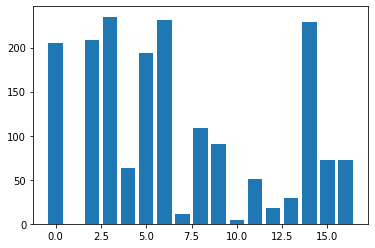

In [768]:
plt.bar(unique,counts)
plt.show()

## AOI Click

Pour recueillir les réponses aux exercices des utilisateurs on va procéder d'une manière similaire en collectant les coordonnées des clics pour les étiqueter

In [27]:
#On retire tous les évènements durant la calibration et les instructions
for c in events:
    for r in events[c]:
        temp=list(events[c][r]['Event'].keys())
        i=0
        while i < len(temp) and "Stimulus" not in events[c][r]['Event'][temp[i]]:
            i+=1
        events[c][r]['Events']={k : events[c][r]['Event'][k] for k in temp if k>=temp[i] }
        events[c][r]['Recording timestamp']={k : events[c][r]['Recording timestamp'][k] for k in temp if k>=temp[i] }

In [28]:
events['c1']['r1']

{'Event': {0: 'RecordingStart',
  53: 'Eye tracker Calibration start',
  823: 'MouseEvent',
  832: 'MouseEvent',
  3352: 'MouseEvent',
  3360: 'MouseEvent',
  3364: 'Eye tracker Calibration end',
  3369: 'InstructionsStart',
  5579: 'MouseEvent',
  5582: 'InstructionsEnd',
  5639: 'MouseEvent',
  5644: 'ImageStimulusStart',
  6877: 'MouseEvent',
  6881: 'ImageStimulusEnd',
  6882: 'ImageStimulusStart',
  6887: 'MouseEvent',
  7690: 'MouseEvent',
  7693: 'ImageStimulusEnd',
  7694: 'ImageStimulusStart',
  7701: 'MouseEvent',
  8668: 'MouseEvent',
  8672: 'ImageStimulusEnd',
  8673: 'ImageStimulusStart',
  8677: 'MouseEvent',
  10146: 'MouseEvent',
  10150: 'ImageStimulusEnd',
  10151: 'ImageStimulusStart',
  10156: 'MouseEvent',
  10821: 'MouseEvent',
  10824: 'ImageStimulusEnd',
  10825: 'ImageStimulusStart',
  10830: 'MouseEvent',
  12562: 'MouseEvent',
  12565: 'ImageStimulusEnd',
  12566: 'ImageStimulusStart',
  12571: 'MouseEvent',
  15063: 'MouseEvent',
  15067: 'ImageStimulusEnd'

In [30]:
m={}
c='c1'
r='r1'
for c in events:
    m[c]={}
    for r in events[c]:
        m[c][r]=[i for i in events[c][r]['Event'] if events[c][r]['Event'][i]=='MouseEvent']

In [31]:
mouse_click={}
for c in m:
    mouse_click[c]={}
    for r in m[c]:
        mouse_click[c][r]={}
        for j in m[c][r]:
            i=0
            found = j <time_stamps[c][r][i]
            while i<(len(time_stamps[c][r])) and not found:
                i+=1
                found = j <time_stamps[c][r][i]
            if j>time_stamps[c][r][0]:
                mouse_click[c][r]['q'+str(i)]=j

In [32]:
click={}
for c in mouse_click:
    click[c]={}
    for r in mouse_click[c]:
        click[c][r]={}
        for q in mouse_click[c][r]:
            event=mouse_click[c][r][q]
            x=df[c][r][q]['Mouse position X'][event+1]
            y=df[c][r][q]['Mouse position Y'][event+1]
            click[c][r][q]=(x,y)

NameError: name 'df' is not defined

In [33]:
time_stamps

{'c1': {'r1': [5644,
   6882,
   7694,
   8673,
   10151,
   10825,
   12566,
   15068,
   15804,
   17126,
   18315],
  'r3': [4692,
   5665,
   6320,
   6849,
   8033,
   8599,
   10326,
   12577,
   13898,
   15806,
   18477],
  'r5': [4643,
   8893,
   9766,
   11026,
   13249,
   16945,
   20724,
   25991,
   29514,
   31607,
   34009]},
 'c2': {'r2': [6251,
   7057,
   7429,
   8269,
   10186,
   10964,
   11932,
   13037,
   14639,
   15352,
   17266],
  'r4': [4615,
   5376,
   6389,
   8197,
   9659,
   11073,
   12124,
   13065,
   14375,
   15501,
   16309],
  'r6': [4496,
   6570,
   7348,
   8420,
   9238,
   10664,
   11713,
   13368,
   13966,
   14596,
   16546]},
 'c3': {'r7': [3882,
   4772,
   5197,
   6248,
   9283,
   9850,
   14092,
   18791,
   20712,
   22461,
   25488],
  'r8': [5977,
   6827,
   7243,
   7965,
   11860,
   12949,
   15066,
   18744,
   20036,
   21646,
   23113],
  'r9': [4657,
   5555,
   5943,
   6687,
   9827,
   11320,
   12988,
   15053,


In [38]:
temps_reponse={}

for c in mouse_click:
    temps_reponse[c]={}
    for r in mouse_click[c]:
        temps_reponse[c][r]={}
        last_click=time_stamps[c][r][0]
        for q in mouse_click[c][r]:
            event=mouse_click[c][r][q]
            this_click=events[c][r]['Recording timestamp'][event]
            temps_reponse[c][r][q]= this_click-last_click
            last_click=this_click

In [39]:
temps_reponse

{'c1': {'r1': {'q1': 107074798,
   'q2': 10415878,
   'q3': 14312269,
   'q4': 22631955,
   'q5': 9687940,
   'q6': 26447672,
   'q7': 39496496,
   'q8': 10495991,
   'q9': 19799709,
   'q10': 17494603},
  'r3': {'q1': 86468202,
   'q2': 8695595,
   'q3': 7088373,
   'q4': 18424172,
   'q5': 8223808,
   'q6': 27104152,
   'q7': 35312081,
   'q8': 20319648,
   'q9': 29544239,
   'q10': 43100383},
  'r5': {'q1': 140824115,
   'q2': 13600016,
   'q3': 20224122,
   'q4': 36231820,
   'q5': 60912347,
   'q6': 61583422,
   'q7': 86592023,
   'q8': 56416017,
   'q9': 33239851,
   'q10': 38712900}},
 'c2': {'r2': {'q1': 114235036,
   'q2': 4976124,
   'q3': 12975836,
   'q4': 184011,
   'q5': 41743919,
   'q6': 15383965,
   'q7': 17144000,
   'q8': 24128297,
   'q9': 11287779,
   'q10': 29627300},
  'r4': {'q1': 84514468,
   'q2': 15328031,
   'q3': 95838,
   'q4': 52751953,
   'q5': 21879949,
   'q6': 16344466,
   'q7': 14519556,
   'q8': 19848100,
   'q9': 17416186,
   'q10': 11938522},
  'r

In [1]:
aoi_click={}
for c in click:
    aoi_click[c]={}
    for r in click[c]:
        aoi_click[c][r]={}
        for q in click[c][r]:
            y=int(click[c][r][q][1])
            x=int(click[c][r][q][0])
            aoi_click[c][r][q]=aoi[c][q][y][x]

NameError: name 'click' is not defined

In [782]:
#On modifie deux click qui sont légèrement décalées par rapport aux aoi
aoi_click['c1']['r1']['q5']=12
aoi_click['c2']['r6']['q5']=12

In [783]:
with open('aoi/aoi_click.json', 'w') as outfile:
    json.dump(aoi_click, outfile) 

In [40]:
import json
with open('aoi/aoi_click.json') as json_file:
    aoi_click= json.load(json_file)

Rappel de l'organisation des AOI

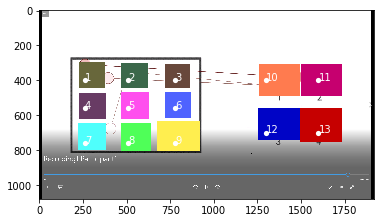

In [804]:
c,q =('c1', 'q10')
fig, ax = plt.subplots()
ax.imshow(img[c][q])
x=echantillons[c][q][0]
y=echantillons[c][q][1]
ax.scatter(x,y,label=range(len(echantillons)), color="white", linewidth=3, s=5)
for i in range(len(echantillons[c][q][0])):
    ax.annotate(i+1, (x[i], y[i]), color='white')
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()

On entre donc ici la bonne réponse aux différentes questions

In [41]:
bonne_reponse={}
for c in ('c1','c2','c3'):
    bonne_reponse[c]={}
bonne_reponse['c1']['q1']=12
bonne_reponse['c2']['q1']=13
bonne_reponse['c3']['q1']=13
bonne_reponse['c1']['q2']=8
bonne_reponse['c2']['q2']=9
bonne_reponse['c3']['q2']=9
bonne_reponse['c1']['q3']=10
bonne_reponse['c2']['q3']=11
bonne_reponse['c3']['q3']=11
bonne_reponse['c1']['q4']=14
bonne_reponse['c2']['q4']=15
bonne_reponse['c3']['q4']=15
bonne_reponse['c1']['q5']=12
bonne_reponse['c2']['q5']=13
bonne_reponse['c3']['q5']=13
bonne_reponse['c1']['q6']=11
bonne_reponse['c2']['q6']=12
bonne_reponse['c3']['q6']=12
bonne_reponse['c1']['q7']=14
bonne_reponse['c2']['q7']=15
bonne_reponse['c3']['q7']=15
bonne_reponse['c1']['q8']=14
bonne_reponse['c2']['q8']=15
bonne_reponse['c3']['q8']=15
bonne_reponse['c1']['q9']=13
bonne_reponse['c2']['q9']=14
bonne_reponse['c3']['q9']=14
bonne_reponse['c1']['q10']=11
bonne_reponse['c2']['q10']=12
bonne_reponse['c3']['q10']=12


On evalue la réponse des participants

In [43]:
evaluation={}
for c in aoi_click:
    evaluation[c]={}
    for r in aoi_click[c]:
        evaluation[c][r]={}
for c in aoi_click:
    for r in aoi_click[c]:
        for q,v in aoi_click[c][r].items():
            evaluation[c][r][q]= 1 if ((v==bonne_reponse[c][q])and temps_reponse[c][r][q]<30000000) else 0
    

In [44]:
evaluation

{'c1': {'r1': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 0,
   'q5': 1,
   'q6': 0,
   'q7': 0,
   'q8': 1,
   'q9': 0,
   'q10': 0},
  'r3': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 1,
   'q5': 1,
   'q6': 0,
   'q7': 0,
   'q8': 0,
   'q9': 0,
   'q10': 0},
  'r5': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 0,
   'q5': 0,
   'q6': 0,
   'q7': 0,
   'q8': 0,
   'q9': 0,
   'q10': 0}},
 'c2': {'r2': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 0,
   'q5': 0,
   'q6': 1,
   'q7': 0,
   'q8': 1,
   'q9': 1,
   'q10': 0},
  'r4': {'q1': 0,
   'q2': 1,
   'q3': 0,
   'q4': 0,
   'q5': 1,
   'q6': 1,
   'q7': 0,
   'q8': 1,
   'q9': 1,
   'q10': 1},
  'r6': {'q2': 0,
   'q3': 1,
   'q4': 0,
   'q5': 0,
   'q6': 0,
   'q7': 1,
   'q8': 0,
   'q9': 0,
   'q10': 1}},
 'c3': {'r7': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 0,
   'q5': 1,
   'q6': 0,
   'q7': 0,
   'q8': 0,
   'q9': 1,
   'q10': 0},
  'r8': {'q1': 0,
   'q2': 1,
   'q3': 1,
   'q4': 0,
   'q5': 1,
   'q6': 0,
   'q7': 0,
   'q8

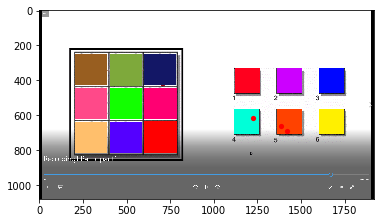

In [814]:
c,q =('c1', 'q9')
fig, ax = plt.subplots()
ax.imshow(img[c][q])
ax.scatter([click[c][r][q][0] for r in click[c]],[click[c][r][q][1] for r in click[c]],label=range(len(echantillons)), color="red", linewidth=3, s=5)
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()

In [45]:
condition=[]
recording=[]
question=[]
reponse=[]
val_reponse=[]
for c in aoi_click:
    for r in aoi_click[c]:
        for q,v in aoi_click[c][r].items():
            condition.append(c)
            recording.append(r)
            question.append(q)
            reponse.append(aoi_click[c][r][q])
            val_reponse.append(evaluation[c][r][q])

In [46]:
evaluation_data=pd.DataFrame()

In [50]:
evaluation_data['Condition']=condition
evaluation_data['Recording']=recording
evaluation_data['Question']=question
evaluation_data['Reponse']=reponse
evaluation_data['Reponse_juste']=val_reponse

In [52]:
evaluation_data.to_csv('evaluation_data.csv')

# Extraction des trajectoires 

In [70]:
c='c1'
r='r1'
q='q1'
traj0=[(aoi_gaze[c][r][q][i],aoi_gaze[c][r][q][i+1]) for i in range(len(aoi_gaze[c][r][q])-1) if (aoi_gaze[c][r][q][i]!=aoi_gaze[c][r][q][i+1]) ]

In [71]:
traj=[]
i=0
while i <len(traj0):
    if (traj0[i][1]==0 and traj0[i+1][0]==0) :
        if (traj0[i][0]!=traj0[i+1][1]):
            traj.append((traj0[i][0],traj0[i+1][1]))
        i+=1
    else:
        traj.append(traj0[i])
    i+=1


In [74]:
traj

[(0, 5),
 (5, 6),
 (6, 10),
 (10, 2),
 (2, 5),
 (5, 8),
 (8, 6),
 (6, 3),
 (3, 6),
 (6, 13),
 (13, 14),
 (14, 15),
 (15, 12),
 (12, 6),
 (6, 3),
 (3, 14),
 (14, 13),
 (13, 10),
 (10, 11),
 (11, 12),
 (12, 11),
 (11, 9),
 (9, 8),
 (8, 9),
 (9, 13),
 (13, 11),
 (11, 10),
 (10, 6),
 (6, 10),
 (10, 6),
 (6, 3),
 (3, 11),
 (11, 10),
 (10, 13),
 (13, 6),
 (6, 3),
 (3, 6),
 (6, 3),
 (3, 5),
 (5, 8),
 (8, 7),
 (7, 8),
 (8, 9),
 (9, 8),
 (8, 13),
 (13, 11),
 (11, 12)]

In [75]:
enchainements={t[0]:{} for t in traj}
for t in traj :
    if t[1] in enchainements[t[0]]:
        enchainements[t[0]][t[1]]+=1
    else :
        enchainements[t[0]][t[1]]=1

In [76]:
enchainements

{0: {5: 1},
 5: {6: 1, 8: 2},
 6: {10: 2, 3: 5, 13: 1},
 10: {2: 1, 11: 1, 6: 2, 13: 1},
 2: {5: 1},
 8: {6: 1, 9: 2, 7: 1, 13: 1},
 3: {6: 2, 14: 1, 11: 1, 5: 1},
 13: {14: 1, 10: 1, 11: 2, 6: 1},
 14: {15: 1, 13: 1},
 15: {12: 1},
 12: {6: 1, 11: 1},
 11: {12: 2, 9: 1, 10: 2},
 9: {8: 2, 13: 1},
 7: {8: 1}}

In [69]:
import pandas as pd
pd.DataFrame(enchainements)

,0,5,6,10,2,8,3,13,14,15,12,11,9,7
5,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,2.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
8,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
10,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [821]:
enonce={'c1':{'q1':range(1,10)}}
reponses={'c1':{'q1':range(10,16)}}

In [828]:
[(i,j) for i,j in traj if (i in enonce[c][q] and j in reponses[c][q])or(j in enonce[c][q] and i in reponses[c][q])]

[]

In [830]:
[(i,j) for i,j in traj if i in enonce[c][q]]

[(5, 6),
 (2, 5),
 (5, 8),
 (8, 6),
 (6, 3),
 (3, 6),
 (6, 3),
 (9, 8),
 (8, 9),
 (6, 3),
 (6, 3),
 (3, 6),
 (3, 5),
 (5, 8),
 (8, 7),
 (7, 8),
 (8, 9)]